In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h","price_change_percentage_7d","price_change_percentage_14d","price_change_percentage_30d","price_change_percentage_60d","price_change_percentage_200d","price_change_percentage_1y"]])
market_data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [9]:


# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(
    market_data_scaled,
    columns = ["price_change_percentage_24h","price_change_percentage_7d","price_change_percentage_14d","price_change_percentage_30d","price_change_percentage_60d","price_change_percentage_200d","price_change_percentage_1y"]
)

# Copy the crypto names from the original DataFrame
df_market_scaled["coin_id"] = df_market_data.index

# Set the coin_id column as index
df_market_scaled =df_market_scaled.set_index("coin_id")

# Display the scaled DataFrame
df_market_scaled.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [10]:
# Create a list with the number of k-values from 1 to 11
inertia = []
k = list(range(1,11)) 

In [11]:
# Create an empty list to store the inertia values
from sklearn.cluster import KMeans

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_data)
    inertia.append(k_model.inertia_)

In [12]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,6.998354e+07
1,2,8.193204e+06
2,3,2.792811e+06
3,4,8.352274e+05
4,5,4.373295e+05


In [13]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
The sharpest drop occurs between K=1 and K =3. The decrease slows down significantly after K =3 and K =4. Following the elbow rule, the best K is where the decreases in interia slows down noticeably. This K= 3 or K=4 as the optimal cluster count. 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [14]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=1)

In [16]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_scaled)

KMeans(n_clusters=3, random_state=1)

In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
k_lower = model.predict(df_market_scaled)

# Print the resulting array of cluster values.
print(k_lower)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 1
 0 0 0 0]


In [18]:
# Create a copy of the scaled DataFrame
scaled_df_predictions = df_market_scaled.copy()

In [19]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_df_predictions["clusters_lower"] = k_lower

# Display the copy of the scaled DataFrame
k_lower

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [20]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
import hvplot.pandas
plot = scaled_df_predictions.hvplot.scatter(
    x= "price_change_percentage_24h",
    y="price_change_percentage_7d",
    c= "clusters_lower",
    hover_cols = ["coin_name"]
).opts(yformatter = "%.0f")

plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters_lower)

### Optimize Clusters with Principal Component Analysis.

In [21]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [26]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
market_pca_data = pca.fit_transform(df_market_scaled)

# View the scaled PCA data
market_pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [27]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 0.88(added up), from a median perspective its about 30%. 

In [37]:
# Create a new DataFrame with the PCA data.
print(market_pca_data.shape)
df_market_data_pca= pd.DataFrame(market_pca_data,columns=["PC1","PC2","PC3"])
# Copy the crypto names from the original scaled DataFrame
df_market_data_pca["coin_id"]=df_market_data.index

# Set the coin_id column as index
df_market_data_pca.set_index("coin_id")

# Display the scaled PCA DataFrame
df_market_data_pca.head()

(41, 3)


,PC1,PC2,PC3,coin_id
0,-0.600667,0.842760,0.461595,bitcoin
1,-0.458261,0.458466,0.952877,ethereum
2,-0.433070,-0.168126,-0.641752,tether
3,-0.471835,-0.222660,-0.479053,ripple
4,-1.157800,2.041209,1.859715,bitcoin-cash


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [41]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))
k_values = range(1,11)

In [44]:
# Create an empty list to store the inertia values
interia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
df_market_data_pca = df_market_data_pca.select_dtypes(include=['number'])

# Create an empty list to store the inertia values
inertia = []  # Fixed typo from "interia" to "inertia"

# Define the range of k values
k_values = range(2, 11)  # Adjust as needed

# Compute inertia for each k
for k in k_values:
    k_model = KMeans(n_clusters=k, random_state=1)
    k_model.fit(df_market_data_pca)
    inertia.append(k_model.inertia_)

# Display the inertia values
print(inertia)

[182.33953007775636, 135.44240762454206, 49.665496651797326, 38.672582175917924, 34.50757653758151, 23.728364781274742, 18.57452344018318, 15.572672210433325, 11.407666572096902]


In [50]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k,"inertia":inertia}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data_pca)
df_elbow.head()

,k,inertia
0,10,182.339530
1,10,135.442408
2,10,49.665497
3,10,38.672582
4,10,34.507577


In [51]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
The best k value is 10.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, it does differ from the best k value found in the original data. The orginal data had a k vlaue between 1 and 3. Using PCA the k value is 10. 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [58]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3,random_state= 1)

In [59]:
# Fit the K-Means model using the PCA data
model.fit(df_market_data_pca)

KMeans(n_clusters=3, random_state=1)

In [60]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
cryptocurrencies_clusters = model.predict(df_market_data_pca)

# Print the resulting array of cluster values.
cryptocurrencies_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [61]:
# Create a copy of the scaled PCA DataFrame
df_market_pca_predictions = df_market_data_pca.copy(0)

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_market_pca_predictions["hover_cols"]= cryptocurrencies_clusters

# Display the copy of the scaled PCA DataFrame
df_market_pca_predictions.head()

,PC1,PC2,PC3,hover_cols
0,-0.600667,0.842760,0.461595,2
1,-0.458261,0.458466,0.952877,2
2,-0.433070,-0.168126,-0.641752,0
3,-0.471835,-0.222660,-0.479053,0
4,-1.157800,2.041209,1.859715,2


In [62]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_market_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="hover_cols",
    title = "Scatter Plot by Cryptocurrency - PCA=2"
)

:NdOverlay   [hover_cols]
   :Scatter   [PC1]   (PC2)

What is the impact of using fewer features to cluster the data using K-Means?


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [72]:
pip install --upgrade numpy


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 22.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [78]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans 
from pyclustering.cluster.kmedoids import kmedoids 
#from pyclustering.utils import random_sample 
from sklearn.metrics import pairwise_distances 
from sklearn.datasets import make_blobs
import random

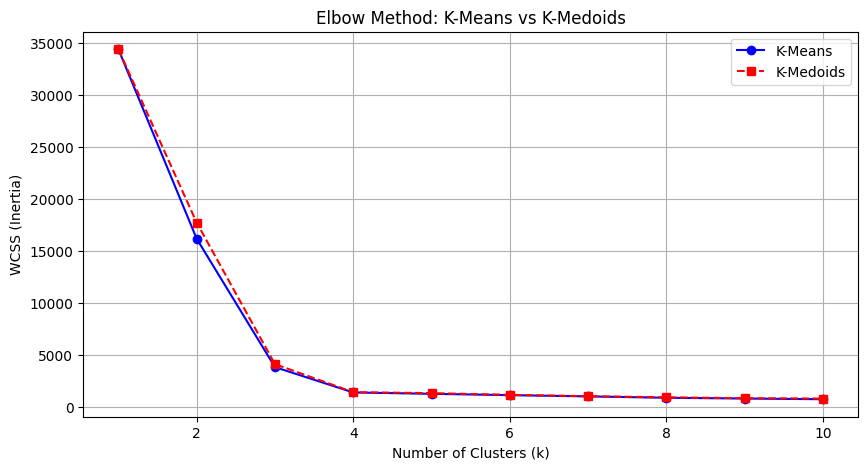

In [79]:
# Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)

# Define range of clusters
k_values = range(1, 11)

# Compute WCSS for K-Means
kmeans_wcss = []
for k in k_values:
    if k == 1:
        kmeans_wcss.append(np.sum(np.min(cdist(X, np.mean(X, axis=0).reshape(1, -1)), axis=1) ** 2))
    else:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        kmeans_wcss.append(kmeans.inertia_)

# Compute WCSS for K-Medoids
kmedoids_wcss = []
for k in k_values:
    if k == 1:
        kmedoids_wcss.append(np.sum(np.min(cdist(X, np.mean(X, axis=0).reshape(1, -1)), axis=1) ** 2))
    else:
        # Randomly select initial medoids
        initial_medoids = random.sample(range(len(X)), k)
        kmedoid_instance = kmedoids(pairwise_distances(X), initial_medoids, data_type='distance_matrix')
        kmedoid_instance.process()
        clusters = kmedoid_instance.get_clusters()
       
        # Compute WCSS (sum of squared distances within clusters)
        inertia = sum(np.sum((X[cluster] - X[medoid]) ** 2) for cluster, medoid in zip(clusters, kmedoid_instance.get_medoids()))
        kmedoids_wcss.append(inertia)

# Plot Elbow curves
plt.figure(figsize=(10, 5))
plt.plot(k_values, kmeans_wcss, marker='o', linestyle='-', label='K-Means', color='blue')
plt.plot(k_values, kmedoids_wcss, marker='s', linestyle='--', label='K-Medoids', color='red')

plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method: K-Means vs K-Medoids")
plt.legend()
plt.grid(True)
plt.show()

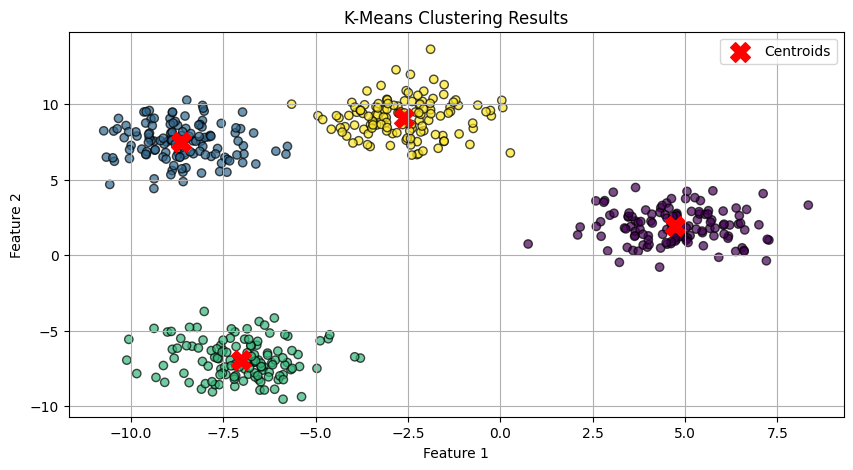

In [80]:
# Composite plot to contrast the clusters
# Perform K-Means clustering with an optimal number of clusters (e.g., 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X)

# Create a composite plot showing the clustered data
plt.figure(figsize=(10, 5))

# Scatter plot of the clustered data
plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.grid()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  The positive impact of using fewer features is a lower-dimensional space, reducing computational complexity.
The algorithm runs faster as fewer distance calculations are required.
And its easier to visualize the data.

The negative impact of using fewer features is if the clusters are not segerated properly it could create overlapping clusters and reduce the agorithm effectiveness.